# Prediction of laptop price with XGBoosting

> The project's goal is to apply the knowledge of using *Python*, *Jupiter Notebook*, libraries (*numpy*, *pandas*, *matplotlib*, *sklearn*, *optuna*, *xgboost*). That work is divided into following parts:
> - data preparation (including data cleaning) 
> - data analytics
> - encoding some labels
> - application of ML model
> - tuning of hyperparameters
> - comparison of results



## Data preparation and analytics

> Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
import xgboost 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import optuna

In [2]:
df = pd.read_csv('laptop_price.csv', encoding='latin1')
df.head()

laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  
3      2537.45  
4      1803.60

> Delete unnecessary and unuseful colums that would not have impact on the final result (**'laptop_ID'** and **'Product'**)

In [3]:
columns_to_delete = ['laptop_ID', 'Product']
df.drop(columns=columns_to_delete, inplace=True)
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight  Price_euros  
0  Intel Iris Plus Graphics 640  macOS  1.37kg      1339.69  
1        Intel HD Graphics 6000  macOS  1.34kg       898.94  
2         Intel HD Graphics 620  No OS  1.86kg       575.00  
3            AMD Radeon Pro 455  macOS  1.83kg      2537.45  
4  Intel Iris Plus Graphics 650  macOS  1.37kg      1803.60

> Checking if all objects consist of all data

In [4]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

> Modifing values from columns **Ram** and **Weight** to *int* and *float* format 

In [5]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype('int32')
df['Weight'] = df['Weight'].str.replace('kg', '').astype('float32')
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight  Price_euros  
0  Intel Iris Plus Graphics 640  macOS    1.37      1339.69  
1        Intel HD Graphics 6000  macOS    1.34       898.94  
2         Intel HD Graphics 620  No OS    1.86       575.00  
3            AMD Radeon Pro 455  macOS    1.83      2537.45  
4  Intel Iris Plus Graphics 650  macOS    1.37      1803.60

> The table of **Screen Resolution** distribution

<Axes: ylabel='ScreenResolution'>

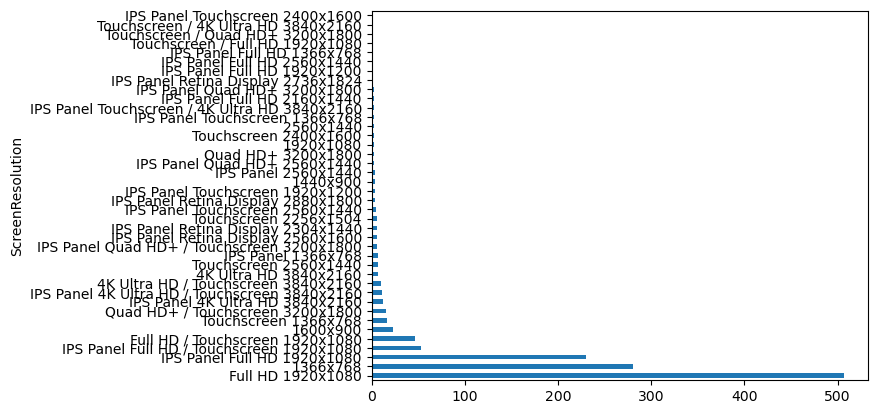

In [6]:
df['ScreenResolution'].value_counts().plot(kind='barh')

> By creating the table of Screen Resolution, we can see how data are distributed, how do different values of the certan propertity look like. As a result, we can make a dicision how the data of the table can be modified. 

> Creating new columns **Touchscreen** and **IPS** from **ScreenResolution** that show if laptop has that property.

In [7]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.sample(n=7)

Company            TypeName  Inches  \
1111       Dell            Notebook    15.6   
755      Lenovo  2 in 1 Convertible    13.3   
449   Microsoft           Ultrabook    13.5   
1114     Lenovo  2 in 1 Convertible    10.1   
940          HP              Gaming    17.3   
149        Acer            Notebook    15.6   
1181     Lenovo           Ultrabook    15.6   

                                ScreenResolution                          Cpu  \
1111                                    1366x768   Intel Core i5 6200U 2.3GHz   
755   IPS Panel Quad HD+ / Touchscreen 3200x1800   Intel Core i5 6260U 1.8GHz   
449                        Touchscreen 2256x1504   Intel Core i7 7660U 2.5GHz   
1114             IPS Panel Touchscreen 1920x1200  Intel Atom x5-Z8550 1.44GHz   
940                  IPS Panel Full HD 1920x1080  Intel Core i5 6300HQ 2.3GHz   
149                                     1366x768     Intel Core i3 6006U 2GHz   
1181                           Full HD 1920x1080   Intel Core i7 7500U 2.7GHz   

      Ram                Memory                           Gpu         OpSys  \
1111    4             500GB HDD            AMD Radeon R5 M315     Windows 7   
755     8             256GB SSD         Intel HD Graphics 540    Windows 10   
449    16             512GB SSD  Intel Iris Plus Graphics 640  Windows 10 S   
1114    4    64GB Flash Storage         Intel HD Graphics 400       Android   
940     8  128GB SSD +  1TB HDD       Nvidia GeForce GTX 965M    Windows 10   
149     4               1TB HDD         Intel HD Graphics 520    Windows 10   
1181    6             256GB SSD           Nvidia GeForce 920M    Windows 10   

      Weight  Price_euros  Touchscreen  IPS  
1111    2.24       769.15            0    0  
755     1.30      1199.00            1    1  
449     1.25      2589.00            1    0  
1114    0.69       549.00            1    1  
940     2.75      1399.00            0    1  
149     2.10       447.00            0    0  
1181    1.54       831.00            0    0

> Creating new columns **x_resolution** and **y_resolution** (converted to *int*) that present resolution in pixels on x and y sides

In [8]:
df['x_resolution'] = df['ScreenResolution'].apply(lambda x:x[x.index('x') - 4 :  x.index('x')])
df['y_resolution'] = df['ScreenResolution'].apply(lambda x:x.split('x')[-1])
df['x_resolution'] = df['x_resolution'].astype('int')
df['y_resolution'] = df['y_resolution'].astype('int')
df.sample(n=7)

Company  TypeName  Inches             ScreenResolution  \
991      HP  Notebook    15.6            Full HD 1920x1080   
525  Lenovo  Notebook    14.0            Full HD 1920x1080   
39       HP  Notebook    15.6            Full HD 1920x1080   
687    Dell  Notebook    15.6                     1366x768   
801    Asus  Notebook    15.6            Full HD 1920x1080   
595  Lenovo  Notebook    15.6                     1366x768   
524    Dell  Notebook    17.3  IPS Panel Full HD 1920x1080   

                            Cpu  Ram                Memory  \
991    Intel Core i3 6006U 2GHz    4  128GB SSD +  1TB HDD   
525  Intel Core i5 6200U 2.3GHz    8             256GB SSD   
39   Intel Core i5 8250U 1.6GHz    8             256GB SSD   
687    Intel Core i3 6006U 2GHz    4               1TB HDD   
801  Intel Core i5 7200U 2.5GHz    8             256GB SSD   
595  Intel Core i3 6100U 2.3GHz    8               1TB HDD   
524  Intel Core i5 8250U 1.6GHz    8  128GB SSD +  1TB HDD   

                       Gpu       OpSys  Weight  Price_euros  Touchscreen  IPS  \
991         AMD Radeon 520  Windows 10    2.10       499.00            0    0   
525  Intel HD Graphics 520   Windows 7    2.02      1340.00            0    0   
39   Nvidia GeForce 930MX   Windows 10    2.10       879.00            0    0   
687     AMD Radeon R5 M430  Windows 10    2.20       545.67            0    0   
801  Intel HD Graphics 620  Windows 10    2.37      1099.00            0    0   
595  Intel HD Graphics 520  Windows 10    2.29       459.00            0    0   
524         AMD Radeon 530       Linux    2.80       889.00            0    1   

     x_resolution  y_resolution  
991          1920          1080  
525          1920          1080  
39           1920          1080  
687          1366           768  
801          1920          1080  
595          1366           768  
524          1920          1080

> Plotting Correlation Heatmap

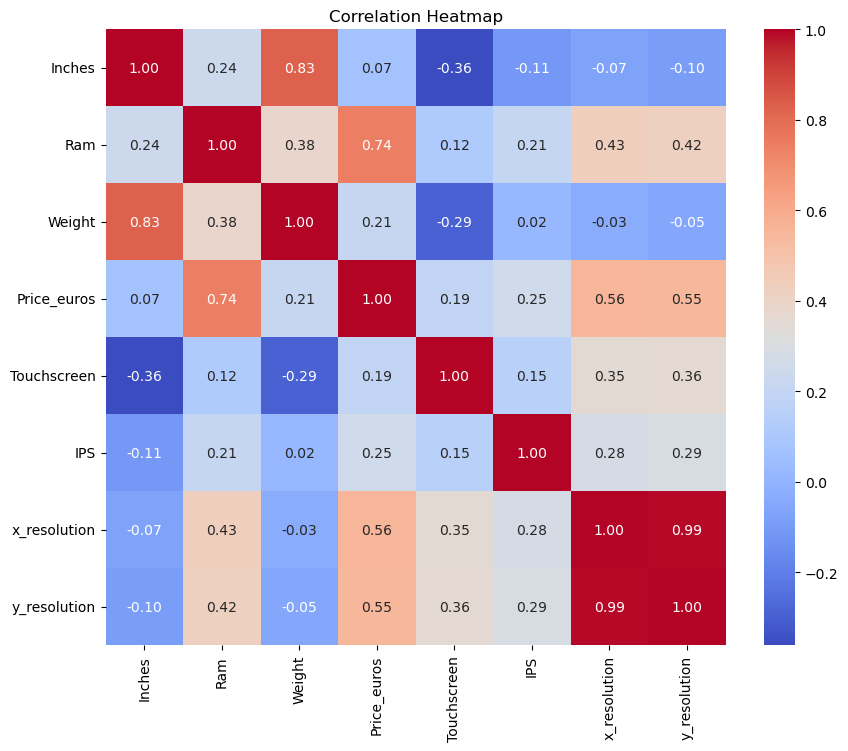

In [9]:
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_cols]

correlation = numerical_df.corr()['Price_euros']
correlation
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

> **Correlation Heatmap** presents the relations between two variables. It can bring a value from -1 to 1, where:
> - -1 indicates a completely negative linear correlation between the two variables
> - 0 indicates that there is no linear correlation between the two variables
> - 1 indicates a completely positive linear correlation between the two variables
>
> The further the correlation coefficient is from zero, the stronger the relationship between the two variables.
>
>
> By analysing my Correlation Heatmap, it is cosidered the following facts: 
> - **Weight** usually mutually depends on **Inches**
> - **Price_euros** usually mutually depends on **Ram**
> - **x_resolution** and **y_resolution** usually mutually depends on **Price_euros**
> - **x_resolution** highly mutually depends on **y_resolution**

> Transform the values **x_resolution**, **y_resolution**, **Inches**, **ScreenResolutin** to **ppi** with the formula of *pixels per inch*. Then delete unuseful columns 

In [10]:
df['ppi'] = (pow(pow(df['x_resolution'], 2) + pow(df['y_resolution'], 2), 0.5) /df['Inches'] ).astype(float)
df.drop(columns=['x_resolution', 'y_resolution', 'ScreenResolution', 'Inches'], inplace=True)
df.head()

Company   TypeName                         Cpu  Ram               Memory  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight  Price_euros  Touchscreen  IPS  \
0  Intel Iris Plus Graphics 640  macOS    1.37      1339.69            0    1   
1        Intel HD Graphics 6000  macOS    1.34       898.94            0    0   
2         Intel HD Graphics 620  No OS    1.86       575.00            0    0   
3            AMD Radeon Pro 455  macOS    1.83      2537.45            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37      1803.60            0    1   

          ppi  
0  226.983005  
1  127.677940  
2  141.211998  
3  220.534624  
4  226.983005

> We look at **Cpu** values to define how they are distributed

In [11]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

> And make a conclusion to divide **Cpu Name** on futher categories: 
> - Intel Core I7, I5, I3
> - other Intel
> - AMD 

In [12]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:' '.join(x.split()[ : 3]))

In [13]:
def split_names(data):
    if data in {'Intel Core i7','Intel Core i5', 'Intel Core i3'}:
        return data
    elif 'Intel' in data:
        return 'Other Intel Processor'
    return 'AMD Processor'

In [14]:
df['Cpu Brand'] = df['Cpu Name'].apply(split_names)
df.drop(columns=['Cpu Name', 'Cpu'], inplace=True)
df.head()

Company   TypeName  Ram               Memory                           Gpu  \
0   Apple  Ultrabook    8            128GB SSD  Intel Iris Plus Graphics 640   
1   Apple  Ultrabook    8  128GB Flash Storage        Intel HD Graphics 6000   
2      HP   Notebook    8            256GB SSD         Intel HD Graphics 620   
3   Apple  Ultrabook   16            512GB SSD            AMD Radeon Pro 455   
4   Apple  Ultrabook    8            256GB SSD  Intel Iris Plus Graphics 650   

   OpSys  Weight  Price_euros  Touchscreen  IPS         ppi      Cpu Brand  
0  macOS    1.37      1339.69            0    1  226.983005  Intel Core i5  
1  macOS    1.34       898.94            0    0  127.677940  Intel Core i5  
2  No OS    1.86       575.00            0    0  141.211998  Intel Core i5  
3  macOS    1.83      2537.45            0    1  220.534624  Intel Core i7  
4  macOS    1.37      1803.60            0    1  226.983005  Intel Core i5

> Look at **Memory** values

In [15]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

> And dicide to transform **Memory** column into several other new columns (**SSD, HDD, Hybrid, Flash Storage**) in *gb* with their values changed to *int*

In [16]:
def extract_storage_size(memory):
    ssd_size = re.search(r'(\d+)(?:GB|TB) SSD', memory)
    hdd_size = re.search(r'(\d+)(?:GB|TB) HDD', memory)
    hybrid_size = re.search(r'(\d+(?:\.\d+)?)TB Hybrid', memory)
    flash_size = re.search(r'(\d+)GB Flash Storage', memory)

    ssd_size_gb = int(float(ssd_size.group(1)) * 1024) if ssd_size and 'TB' in ssd_size.group() else int(ssd_size.group(1)) if ssd_size else 0
    hdd_size_gb = int(hdd_size.group(1)) * 1024 if hdd_size and 'TB' in hdd_size.group() else int(hdd_size.group(1)) if hdd_size else 0
    hybrid_size_gb = int(float(hybrid_size.group(1)) * 1024) if hybrid_size else 0
    flash_size_gb = int(flash_size.group(1)) if flash_size else 0

    return ssd_size_gb, hdd_size_gb, hybrid_size_gb, flash_size_gb

df['SSD'], df['HDD'], df['Hybrid'], df['Flash Storage'] = zip(*df['Memory'].apply(extract_storage_size))
df.drop(columns=['Memory'], inplace=True)
df.sample(7)

Company   TypeName  Ram                         Gpu       OpSys  Weight  \
288    Lenovo     Gaming   16  Nvidia GeForce GTX 1050 Ti  Windows 10    2.50   
748      Dell   Notebook    8       Intel HD Graphics 620  Windows 10    1.60   
501        HP   Notebook    8              AMD Radeon 520  Windows 10    1.91   
1046       HP   Notebook    8       Intel HD Graphics 520   Windows 7    1.43   
415      Dell   Notebook    4          AMD Radeon R5 M430       Linux    2.30   
472    Google  Ultrabook    8       Intel HD Graphics 615   Chrome OS    1.10   
742   Toshiba   Notebook    8       Intel HD Graphics 620  Windows 10    1.25   

      Price_euros  Touchscreen  IPS         ppi      Cpu Brand  SSD   HDD  \
288       1179.00            0    1  141.211998  Intel Core i7  256  1024   
748       1126.71            0    0  111.935204  Intel Core i5  256     0   
501        618.99            0    0  100.454670  Intel Core i5  256     0   
1046      1469.00            0    0  157.350512  Intel Core i5  256     0   
415        598.90            0    0  141.211998  Intel Core i5  256     0   
472       1275.00            1    0  234.507400  Intel Core i5  128     0   
742       1535.00            1    1  157.350512  Intel Core i5  256     0   

      Hybrid  Flash Storage  
288        0              0  
748        0              0  
501        0              0  
1046       0              0  
415        0              0  
472        0              0  
742        0              0

> Analysing the correlation

In [17]:
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_cols]

correlation = numerical_df.corr()['Price_euros']
correlation

Ram              0.743007
Weight           0.210370
Price_euros      1.000000
Touchscreen      0.191226
IPS              0.252208
ppi              0.473487
SSD              0.675986
HDD             -0.093112
Hybrid           0.008822
Flash Storage   -0.040511
Name: Price_euros, dtype: float64

>And deleting unuseful properties **Hybrid** and **Flash Storage**

In [18]:
df.drop(columns=['Hybrid', 'Flash Storage'], inplace=True)
df.head()

Company   TypeName  Ram                           Gpu  OpSys  Weight  \
0   Apple  Ultrabook    8  Intel Iris Plus Graphics 640  macOS    1.37   
1   Apple  Ultrabook    8        Intel HD Graphics 6000  macOS    1.34   
2      HP   Notebook    8         Intel HD Graphics 620  No OS    1.86   
3   Apple  Ultrabook   16            AMD Radeon Pro 455  macOS    1.83   
4   Apple  Ultrabook    8  Intel Iris Plus Graphics 650  macOS    1.37   

   Price_euros  Touchscreen  IPS         ppi      Cpu Brand  SSD  HDD  
0      1339.69            0    1  226.983005  Intel Core i5  128    0  
1       898.94            0    0  127.677940  Intel Core i5    0    0  
2       575.00            0    0  141.211998  Intel Core i5  256    0  
3      2537.45            0    1  220.534624  Intel Core i7  512    0  
4      1803.60            0    1  226.983005  Intel Core i5  256    0

> Analysing the **Gpu** values

In [19]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

> Creating new property **Gpu Brand** from the existing one **Gpu**

In [20]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x: x.split()[0])
df.head()

Company   TypeName  Ram                           Gpu  OpSys  Weight  \
0   Apple  Ultrabook    8  Intel Iris Plus Graphics 640  macOS    1.37   
1   Apple  Ultrabook    8        Intel HD Graphics 6000  macOS    1.34   
2      HP   Notebook    8         Intel HD Graphics 620  No OS    1.86   
3   Apple  Ultrabook   16            AMD Radeon Pro 455  macOS    1.83   
4   Apple  Ultrabook    8  Intel Iris Plus Graphics 650  macOS    1.37   

   Price_euros  Touchscreen  IPS         ppi      Cpu Brand  SSD  HDD  \
0      1339.69            0    1  226.983005  Intel Core i5  128    0   
1       898.94            0    0  127.677940  Intel Core i5    0    0   
2       575.00            0    0  141.211998  Intel Core i5  256    0   
3      2537.45            0    1  220.534624  Intel Core i7  512    0   
4      1803.60            0    1  226.983005  Intel Core i5  256    0   

  Gpu Brand  
0     Intel  
1     Intel  
2     Intel  
3       AMD  
4     Intel

In [21]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [22]:
df = df[df['Gpu Brand'] != 'ARM']
df.head()

Company   TypeName  Ram                           Gpu  OpSys  Weight  \
0   Apple  Ultrabook    8  Intel Iris Plus Graphics 640  macOS    1.37   
1   Apple  Ultrabook    8        Intel HD Graphics 6000  macOS    1.34   
2      HP   Notebook    8         Intel HD Graphics 620  No OS    1.86   
3   Apple  Ultrabook   16            AMD Radeon Pro 455  macOS    1.83   
4   Apple  Ultrabook    8  Intel Iris Plus Graphics 650  macOS    1.37   

   Price_euros  Touchscreen  IPS         ppi      Cpu Brand  SSD  HDD  \
0      1339.69            0    1  226.983005  Intel Core i5  128    0   
1       898.94            0    0  127.677940  Intel Core i5    0    0   
2       575.00            0    0  141.211998  Intel Core i5  256    0   
3      2537.45            0    1  220.534624  Intel Core i7  512    0   
4      1803.60            0    1  226.983005  Intel Core i5  256    0   

  Gpu Brand  
0     Intel  
1     Intel  
2     Intel  
3       AMD  
4     Intel

In [23]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [24]:
df.drop(columns=['Gpu'], inplace= True)

In [25]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

> Processing **OpSys** property by dividing into futher properties:
> - Windows
> - Mac
> - Others/No OS/Linux


In [26]:
def cat_OS(inp):
    if inp in {'Windows 10', 'Windows 7', 'Windows 10 S'}:
        return 'Windows'
    elif inp in {'Mac OS X', 'macOS'}:
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
df['OS'] = df['OpSys'].apply(cat_OS)
df.drop(columns=['OpSys'], inplace=True)

In [27]:
df.head()

Company   TypeName  Ram  Weight  Price_euros  Touchscreen  IPS         ppi  \
0   Apple  Ultrabook    8    1.37      1339.69            0    1  226.983005   
1   Apple  Ultrabook    8    1.34       898.94            0    0  127.677940   
2      HP   Notebook    8    1.86       575.00            0    0  141.211998   
3   Apple  Ultrabook   16    1.83      2537.45            0    1  220.534624   
4   Apple  Ultrabook    8    1.37      1803.60            0    1  226.983005   

       Cpu Brand  SSD  HDD Gpu Brand                  OS  
0  Intel Core i5  128    0     Intel                 Mac  
1  Intel Core i5    0    0     Intel                 Mac  
2  Intel Core i5  256    0     Intel  Others/No OS/Linux  
3  Intel Core i7  512    0       AMD                 Mac  
4  Intel Core i5  256    0     Intel                 Mac

## Encoding

> Using *LabelEncoder* for the properties **Company, TypeName, Cpu Brandm, Gpu Brand, Os** to code them from letter to digital form for the futer usage

In [28]:
columns_to_encode = ['Company', 'TypeName', 'Cpu Brand', 'Gpu Brand', 'OS']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [29]:
df.head()

Company  TypeName  Ram  Weight  Price_euros  Touchscreen  IPS         ppi  \
0        1         4    8    1.37      1339.69            0    1  226.983005   
1        1         4    8    1.34       898.94            0    0  127.677940   
2        7         3    8    1.86       575.00            0    0  141.211998   
3        1         4   16    1.83      2537.45            0    1  220.534624   
4        1         4    8    1.37      1803.60            0    1  226.983005   

   Cpu Brand  SSD  HDD  Gpu Brand  OS  
0          2  128    0          1   0  
1          2    0    0          1   0  
2          2  256    0          1   1  
3          3  512    0          0   0  
4          2  256    0          1   0

## Machine Learning model

> Using **eXtreme Gradient Boosting** library for price prediction. Firstly, the scaler is used for **Ram, Weight, Price_euros, ppi** for data normalization

In [30]:
scaler = MinMaxScaler()
columns_to_scale = ['Ram', 'Weight', 'Price_euros', 'ppi']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

> Split the data into *test* and *train* sets

In [31]:
x=df.drop('Price_euros',axis=1)
y=df['Price_euros']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

> Create a function to evaluate model performance

In [32]:
def evaluate_model_performance(model, x_train, y_train, x_test, y_test):
    # Evaluating model performance on a training dataset
    train_score = model.score(x_train, y_train)
    print("Train Score:", train_score)

    # Evaluating model performance on a test dataset
    test_score = model.score(x_test, y_test)
    print("Test Score:", test_score)

    # Prediction based on a test dataset
    y_pred = model.predict(x_test)

    # Calculating metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae,mse,rmse,r2
  

> Create a first basic model with default settings and show the metrics - *Mean Absolute Error* **(MAE)**, *Mean Square Error* **(MSE)**, *Root-Mean-Square Error* **(RMSE)** and *XGBRegressor Score* **(R2)**

In [33]:
xgb = XGBRegressor(n_estimators=15, max_depth=3)
xgb.fit(x_train, y_train)
train_score = xgb.score(x_train,y_train)
test_score = xgb.score(x_test,y_test)
xgb_mae, xgb_mse, xgb_rmse, xgb_r2 = evaluate_model_performance(xgb, x_train, y_train, x_test, y_test)
y_pred_initial = xgb.predict(x_test)
print("Original XGBoost Model Performance:")
print('MAE: ', xgb_mae)
print('MSE: ', xgb_mse)
print('RMSE: ', xgb_rmse)
print('R2: ', xgb_r2)

Train Score: 0.856520690684204
Test Score: 0.81537100343928
Original XGBoost Model Performance:
MAE:  0.0365987634053147
MSE:  0.0026657081998804327
RMSE:  0.0516304968006355
R2:  0.81537100343928


## Tuning of hyperparameters

> Tuning hyperparameters with **GredSearchCV** and presenting the best ones. And, as a result, applying the best hyperparameters once againg and reacing the better model

In [34]:
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

#Searching for optimal hyperparameters
grid_search.fit(x_train, y_train)

print("The best hyperparameters:", grid_search.best_params_)

#The best model
best_xgb_model = grid_search.best_estimator_

best_train_score = best_xgb_model.score(x_train,y_train)
best_test_score = best_xgb_model.score(x_test,y_test)

y_pred_tuned = best_xgb_model.predict(x_test)

best_xgb_mae, best_xgb_mse, best_xgb_rmse, best_xgb_r2 = evaluate_model_performance(best_xgb_model, x_train, y_train, x_test, y_test)
print("\nBest XGBoost Model Performance:")
print('MAE: ', best_xgb_mae)
print('MSE: ', best_xgb_mse)
print('RMSE: ', best_xgb_rmse)
print('R2: ', best_xgb_r2)

The best hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Train Score: 0.9678883946627266
Test Score: 0.8569413401201432

Best XGBoost Model Performance:
MAE:  0.0303321301586802
MSE:  0.0020655078552637997
RMSE:  0.045447858643326636
R2:  0.8569413401201432


## Results

> Creating the comparison table

In [35]:
# Creating dictionaries with model results
original_xgb_results = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2', 'Train Score', 'Test Score'],
    'Original XGBoost': [xgb_mae, xgb_mse, xgb_rmse, xgb_r2, train_score, test_score]
}

best_xgb_results = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2', 'Train Score', 'Test Score'],
    'Best XGBoost': [best_xgb_mae, best_xgb_mse, best_xgb_rmse, best_xgb_r2, best_train_score, best_test_score]
}

# Converting Dictionaries to Data Frame
original_xgb_df = pd.DataFrame(original_xgb_results)
best_xgb_df = pd.DataFrame(best_xgb_results)

# Combining the results into a single DataFrame
comparison_df = pd.merge(original_xgb_df, best_xgb_df, on='Metric')


print(comparison_df)

        Metric  Original XGBoost  Best XGBoost
0          MAE          0.036599      0.030332
1          MSE          0.002666      0.002066
2         RMSE          0.051630      0.045448
3           R2          0.815371      0.856941
4  Train Score          0.856521      0.967888
5   Test Score          0.815371      0.856941


> Comparing the results, it is seen that tunning process was successful 

> Creating graphs with results

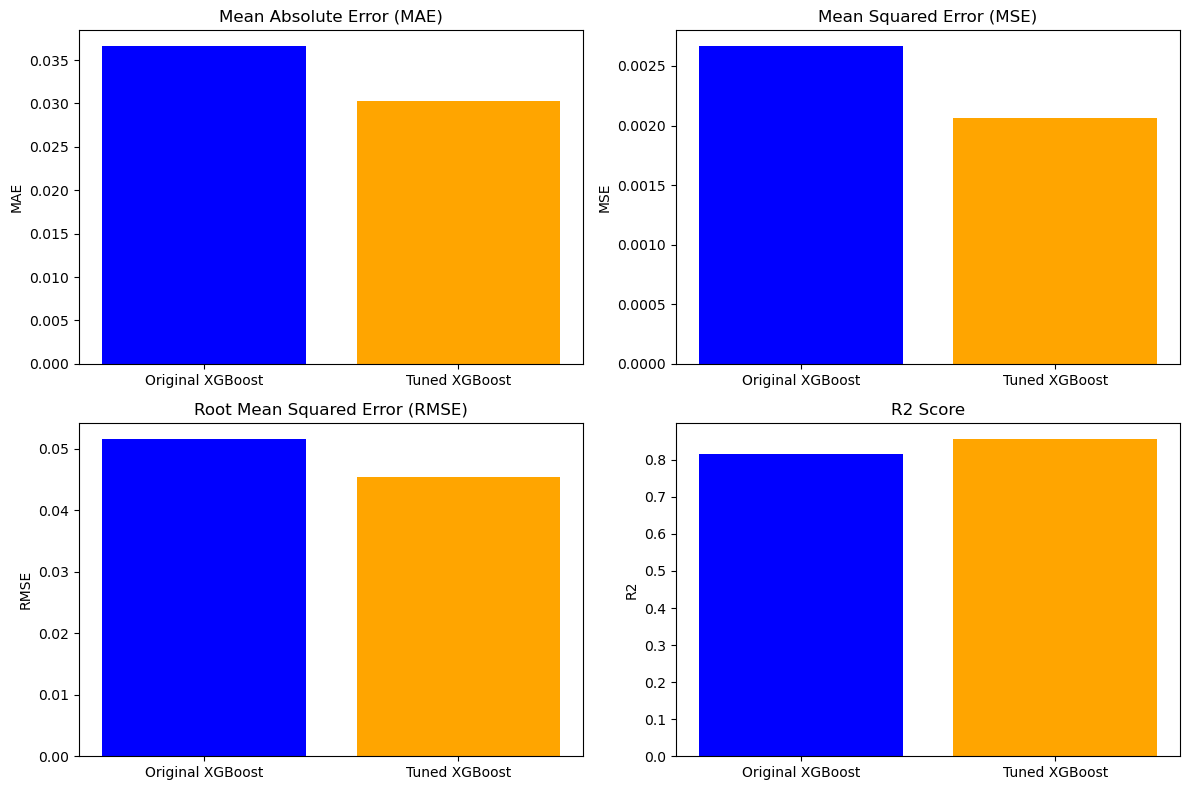

In [36]:
# Creating lists to store the metric values of each model
models = ['Original XGBoost', 'Tuned XGBoost']
mae_scores = [xgb_mae, best_xgb_mae]
mse_scores = [xgb_mse, best_xgb_mse]
rmse_scores = [xgb_rmse, best_xgb_rmse]
r2_scores = [xgb_r2, best_xgb_r2]

#Creating custom graphs for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# MAE
axs[0, 0].bar(models, mae_scores, color=['blue', 'orange'])
axs[0, 0].set_title('Mean Absolute Error (MAE)')
axs[0, 0].set_ylabel('MAE')

# MSE
axs[0, 1].bar(models, mse_scores, color=['blue', 'orange'])
axs[0, 1].set_title('Mean Squared Error (MSE)')
axs[0, 1].set_ylabel('MSE')

# RMSE
axs[1, 0].bar(models, rmse_scores, color=['blue', 'orange'])
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_ylabel('RMSE')

# R2
axs[1, 1].bar(models, r2_scores, color=['blue', 'orange'])
axs[1, 1].set_title('R2 Score')
axs[1, 1].set_ylabel('R2')

# Avoid overlapping labels on charts
plt.tight_layout()

plt.show()

> On the graphs it is seen that **Tuned** model is more efficient than the simple **Original** model according to several criteria

In [37]:
def plot_three_ys(y_pred_initial, y_test, y_pred_tuned):
  plt.figure(figsize=(15, 10))
  plt.plot(y_pred_initial, label='initial prediction')
  plt.plot(y_test, label='test data')
  plt.plot(y_pred_tuned, label='tuned prediction')
  plt.legend(fontsize=20)
  plt.xlabel('Index of the observation', fontsize=20)
  plt.ylabel('Y (price)', fontsize=20)
  plt.show()

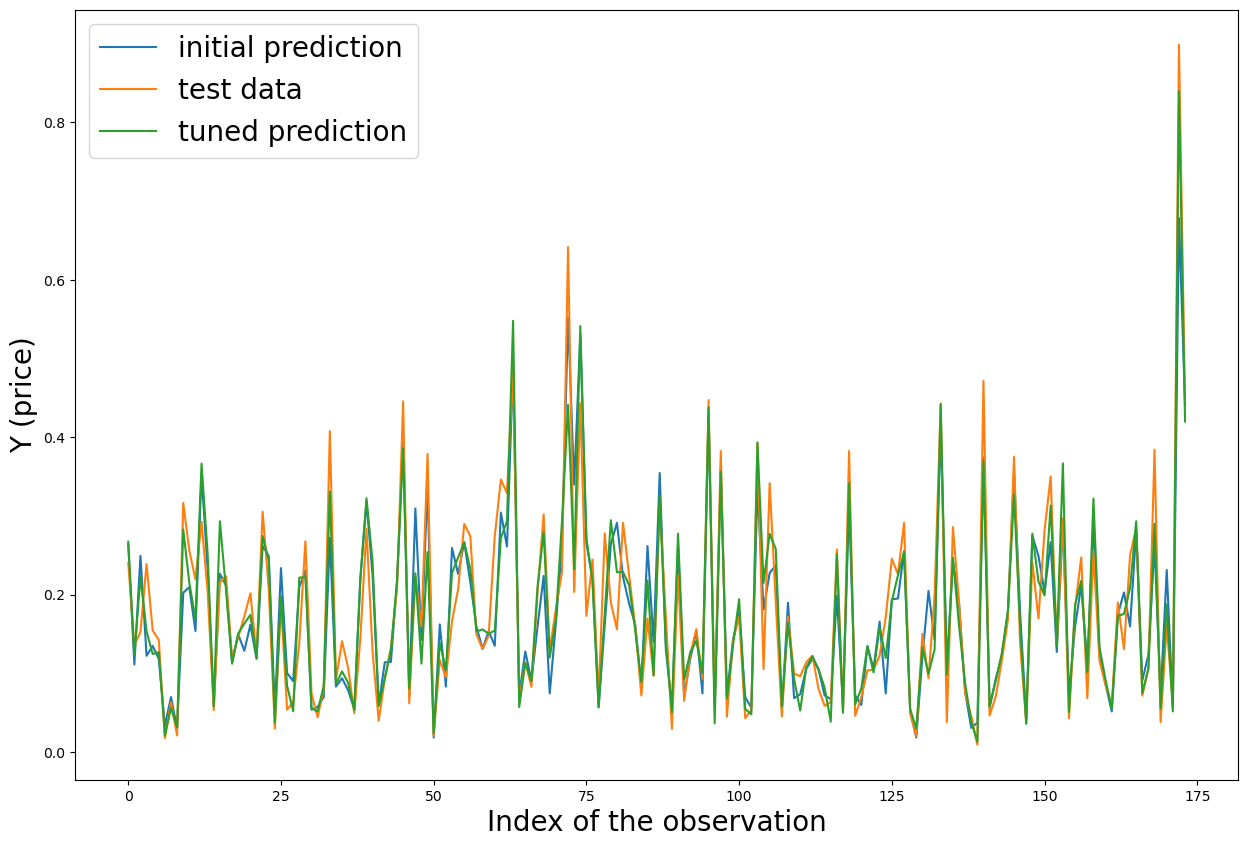

In [38]:
y_test = y_test.values
y_test = y_test[0 : int(2*len(y_test)/3)]
y_pred_initial = y_pred_initial[0 : int(2*len(y_pred_initial)/3)]
y_pred_tuned = y_pred_tuned[0 : int(2*len(y_pred_tuned)/3)]
plot_three_ys(y_pred_initial, y_test, y_pred_tuned)

>  The following graph shows the comparison of the accuracy. As a result, the efficient model for laptop price's prediciton was created